# Silvia Menchetti 
# GTDA exam, May 2023

In [1]:
from IPython import display
from PIL import Image

# Statistical Tools for TDA

### References for today 
-  N. Otter, A. Porter, "A roadmap to the computation of persistence homology",2017
- S. Ellis, A. Klein, "Describing high-order statistical dependence using concurrence topology, with application to functional MRI brain data", 2013
- K. Turner, "Hypothesis testing for topological data analysis", 2017
- B. Fasy,"Confidence sets for persistence diagrams",2014

# Introduction

TDA's $\textcolor{orange}{main~~goal }$ is to develop tools to study qualitative features of data. 

### Requests
- precise definition of qualitative features
- tools to compute them
- sound theoretical support

### How to assess them?
Employing a method of TDA called $\textcolor{yellow}{persistence ~~ homology }$\
Persistence homology is an appealing tool because:

- it is based on algebraic topology
- it can be computed via linear algebra
- it is robust 

### The issue
It is not easy to combine topological tools with the ones from statistics that are important to manage data.


# Tools of the trade 

Let us do a brief recap over the elements from algebraic topology that we will be using throughout.

Our data will be clouds of points embedded in $\mathcal{R}^d$.

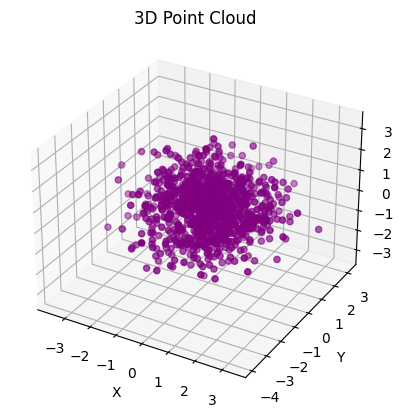

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

num_points = 1000
x = np.random.randn(num_points)
y = np.random.randn(num_points)
z = np.random.randn(num_points)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, z, c='purple', marker='o')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('3D Point Cloud')

# Show the plot
plt.show()


## Homology as a descriptive tool

Given a $\textcolor{yellow}{point~~cloud}$ that lies on a metrice space, \
in general we are not interested in its precise geometry, 
but rather in its $\textcolor{yellow}{main ~~features}$. \
Homology helps us in this description:

$~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~$ $H_i(X) \rightarrow X $  for $i \in \mathcal{N}$

Homology is the association between the vector space  $H_i(X)$ and the space X for every natural number $i$.\
These structures are $\textbf{robust}$ as they are $\textbf{homotopy invariant}$.
###  How to represent the homology of a topological space?
The representation is not straightforward.\
 We represent it by approximating the space by combinatorial structures called ${\textbf{simplicial complexes}}$.

### What is a simplicial complex?
$\textcolor{orange}{\textbf{The idea}}$: It is a space built from the union of points, edges, triangles and higher dimensional structures.

$\textcolor{yellow}{\textbf{The definition}}$:\
A simplicial complex is a collection $K$ of non-empty subsets of a given set $K_0$ such that
- {v} $\in K$ for all v $\in K_0$
- if $\sigma \subset \tau$ and $\sigma \in K$ then $\tau \in K$
- if $\sigma_1$,$\sigma_2 \in K$, then $\sigma_1 \cap \sigma_2 \in K$

The elements in $K_0$ are called vertices of $K$
 and the elements of $K$ are called simplices.
 
$K_p$ is the collection of p-simplices.

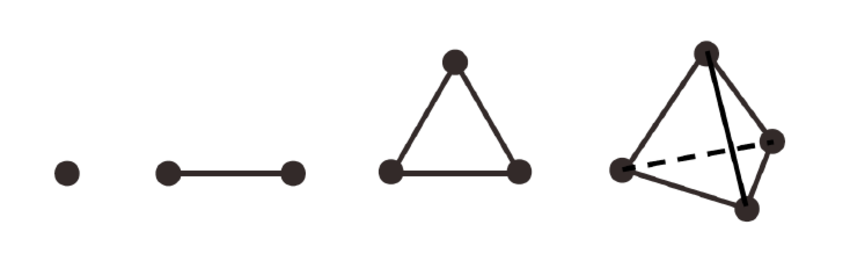

In [3]:
display.display(Image.open('simplices.png'))

### How to construct simplicial complexes?
$\textcolor{pink}{\textbf{The Vietoris-Rips Complex }}$

Given $S \subset \mathcal{R}^d$ and given $\epsilon \in \mathcal{R}^+$,\
the Vietoris-Rips complex of $S$ at scale $\epsilon$ is:\
$~~~~~~~~~~~~~~~~~~~~~~$ $VR_\epsilon(S)=${$\sigma \subseteq S| d(x,y) \leq 2 \epsilon$ for all $x,y \in \sigma$}


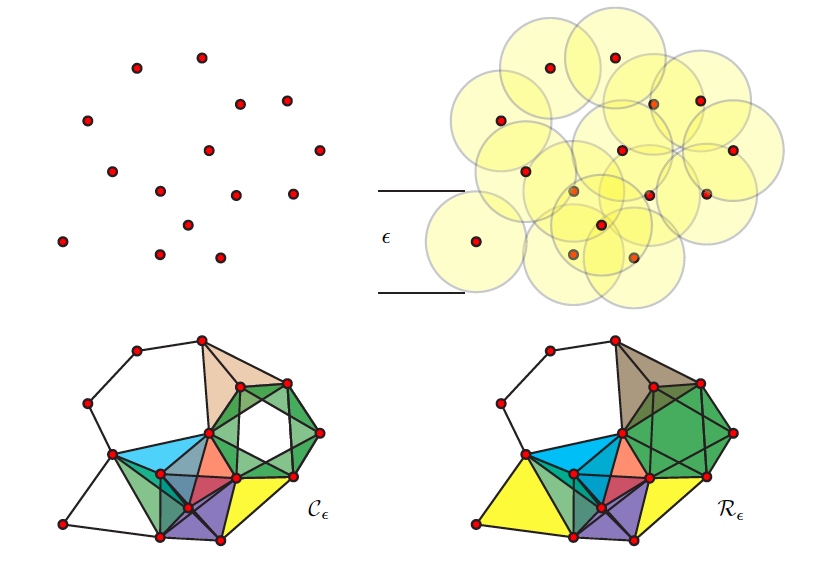

In [2]:
display.display(Image.open('construction.png'))

## Homology for simplicial complexes
Let $\mathcal{F}_2$ denote the field with two elements.\
 Given a simplicial complex $K$, let $C_p(K)$ denote the $\mathcal{F}_2$-vector space\
 with basis provided by the p-simplices of $K$. 

For any $p$,\
 we define a $\textcolor{pink}{\textbf{linear map}}$ $d_p:C_p(K) \rightarrow C_{p-1}(K)$, i.e. $d_p: \sigma \rightarrow \sum \limits_{\tau \subset \sigma, \tau \in K_{p-1}} \tau$.\
The function maps each p-simplex to its boundary. Because the boundary of a boundary is always empty $d_p \circ d_{p+1}=0$.

As a consequence, the image of $d_{p+1}$ is contained in the kernel of $d_p$ and we have the following definition:

For any p $\in$ {0,1,2,...} the $\textcolor{pink}{{p^{th}-homology}}$ of a simplicial complex $K$ is the quotient vector space  $\textcolor{pink}{H_p(K):= ker(d_p)/im(d_{p+1})}$.

${\textbf{What is the pipeline in practice?}}$

The tipical pipeline considers the construction of a Vietoris-Rips complex for a chosen value $\epsilon$ and then compute the homology.

$\textcolor{yellow}{\textbf{Problem of the approach}}$: there is no clear a priori choice for the value of the parameter.

$\textbf{Thus}$ to extract qualitative features  we consider different values of $\epsilon$ as it increases. By doing so, simplices are added to the complex.

$\textcolor{orange}{\textbf{Seeing how the homology of complexes changes as the parameter does helps us detect those featureas that are persistent.}}$

## Filtered complexes and  persistence homology

 Let $K$ be a finite simplicial complex, and let $K_1 \subset K_2 \subset ... K_l=K$ be a finite sequence of nested subcomplexes of $K$.

The simplicial complex $K$ with such a sequence of complexes is called a $\textcolor{orange}{\textit{ filtered simplicial complex}}$.

 We can apply homology to each subcomplex:

 For all $p$, 
 for all $i,j \in${1,...,l} with $i \leq j$\
 the inclusion maps $K_i \rightarrow K_j$ induce $F_2$-linear maps \
 $~~~~~~~~~~~$ $f_{i,j}:H_p(K_i) \rightarrow H_p(K_j)$

 For all $i \leq k \leq j$,\
 $~~~~~~~~~~~$ $f_{k,j} \circ f_{i,k}=f_{i,j}$

${\textbf{Definition of pth persistence homology}}$

Let $K_1 \subset K_2 \subset ... K_l=K$ be a filetered simplicial complex.

The $p^{th}$-persistence homology of K is the pair:

$~~~~~~~~~~$ ($H_p(K_i)$,$f_{ij}$) with $1 \leq i \leq j \leq l$

Persistence homology of a filtered simplicial complex gives more informations than homology on a single subcomplex.

It provides us a list of ${births}$ and  ${deaths}$ of the topological features of $K$.

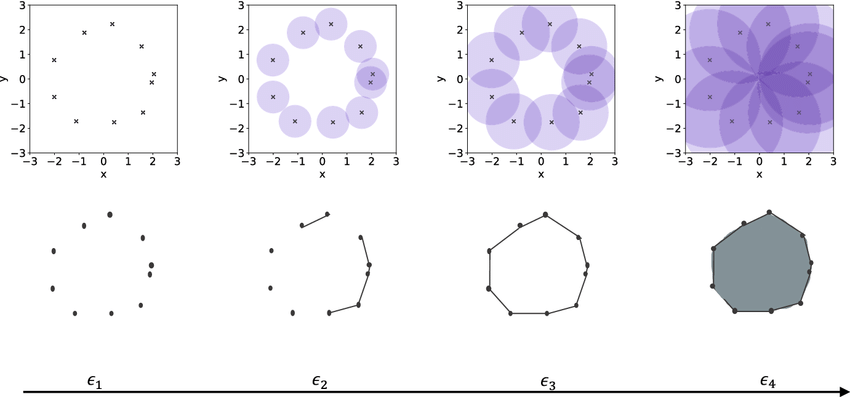

In [5]:
display.display(Image.open('Rips_filtration.png'))

### Persistence Diagrams

A persistence diagram is a way to encode persistence homology \
in term of a multiset of couples  $(a,b)$ with $ a\leq b$.

# Today's Roadmap 

Introduction of three basic concepts of statistics:

-  high-order statistical dependences
- NHST 
- confidence regions for persistence diagrams

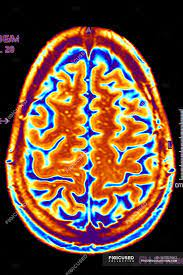

In [6]:
display.display(Image.open('brainfmri.jpeg'))

# Detecting high-order statistical dependences 

For multivariate data, detecting dependences can be a cumbersome task.

## How to describe dependences?

A nonparametric method, developed for describing the high-order dependence structure of  binary data,

is $\textcolor{yellow}{\textbf{concurrence topology}}$.

It produces ${summaries}$ of $p^{th}$ order dependence of manageable size, no matter the p.

### The overall idea 
Let us consider $X \rightarrow$ {0,1}.

$X$ is $\textcolor{yellow}{\textbf{active}}$  when $X$=1.

A set of variables $X_1,...,X_p$ are $\textcolor{yellow}{\textbf{positively associated}}$ if when some of the variables are active,\
then all $p$ variables tend to be active.

$X_1,...,X_p$ tend to be weakly associated when $\frac{m}{p} <<1$ with m = # active variables.

Our approach towards data is an ${\textbf{agnostic}}$ one.
#### Let us explain our approach to concurrence topology by a toy example




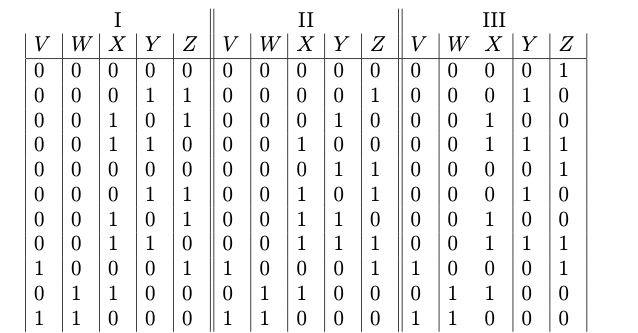

In [7]:
display.display(Image.open('im3.png'))

We write down each variable as a vector of 0s and 1s.

A $\textcolor{pink}{\textbf{concurrence}}$ is a group of variables that are  1 at the same observation.

By writting down concurrences for every observation, we get a $\textcolor{pink}{\textbf{concurrence list}}$.

concurrence list in dataset 1: YZ, XZ, XY, XZ, XY, VZ, WX, VW.

concurrence list in dataset 2: Z,Y,X,ZY,XZ,XY,XYZ,VZ,WX,VW

concurrence list in dataset 3:Z,Y,X,XYZ,Z,Y,X,XYZ,Z,WX,VW



### I want to give shape to these concurrences

- We choose each variable as a vertex in general position in the plane.
- If two variables are concurrent we connect the corresponding vertices by a segment ($\textit{1-simplex}$).
- If three variables are concurrent, we triangulate them ($\textit{2-simplex}$).

The resulting structure is the $\textcolor{yellow}{\textbf{Curto-Itskov complex}}$ of the concurrence list.

### Example of the construction

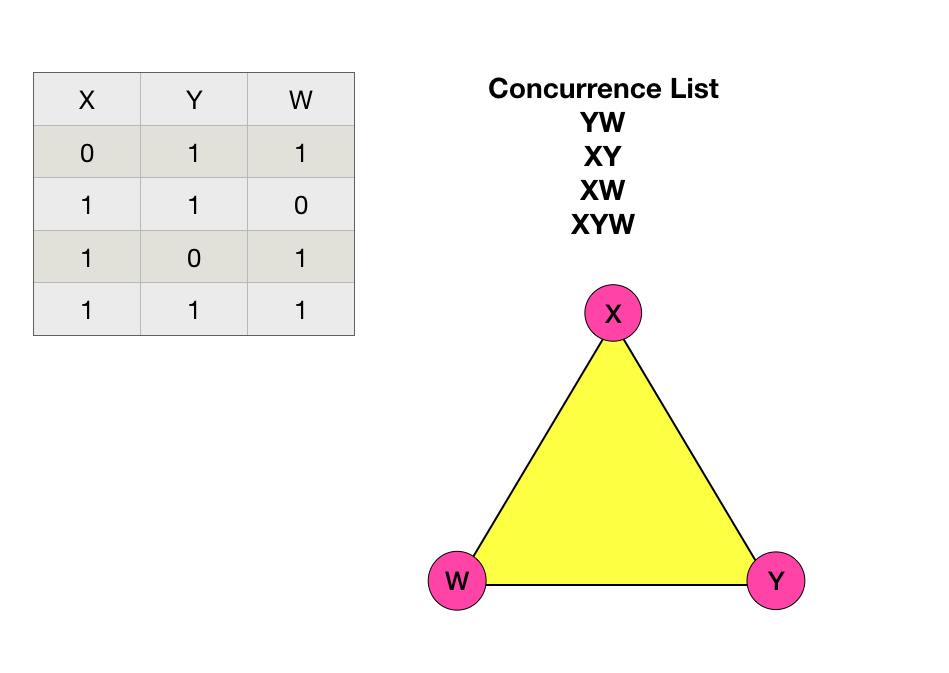

In [3]:
display.display(Image.open('concurrence.png'))

Applying this to our toy dataset, we see the resulting Curto-Itskov complexes from the three concurrence lists:

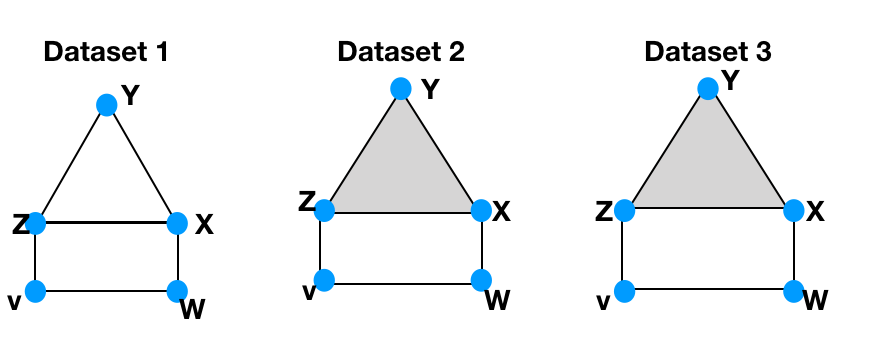

In [4]:
display.display(Image.open('curto-itskov.png'))

In order to $\textbf{distinguish}$ the three datasets,\
it is ${necessary}$ to construct a decreasing series of shapes indexed by the $\textbf{frequency level}$.

The $\textcolor{yellow}{\textbf{frequency level}}$ of a variable is the number of times it appears in the concurrence list,\
i.e. for how many observations it was active, even as part of a larger concurrence.

So this decreasing series indexed by the frequency level works as a...
### Filtration over the Curto-Itskov complex

The investigation of joint distributions of multivariate data on the filtered Curto-Itskov complex is called\
$~~~~~~~~~~~~~~~~~~~~$ $\textcolor{pink}{\textbf{concurrence topology}}$.

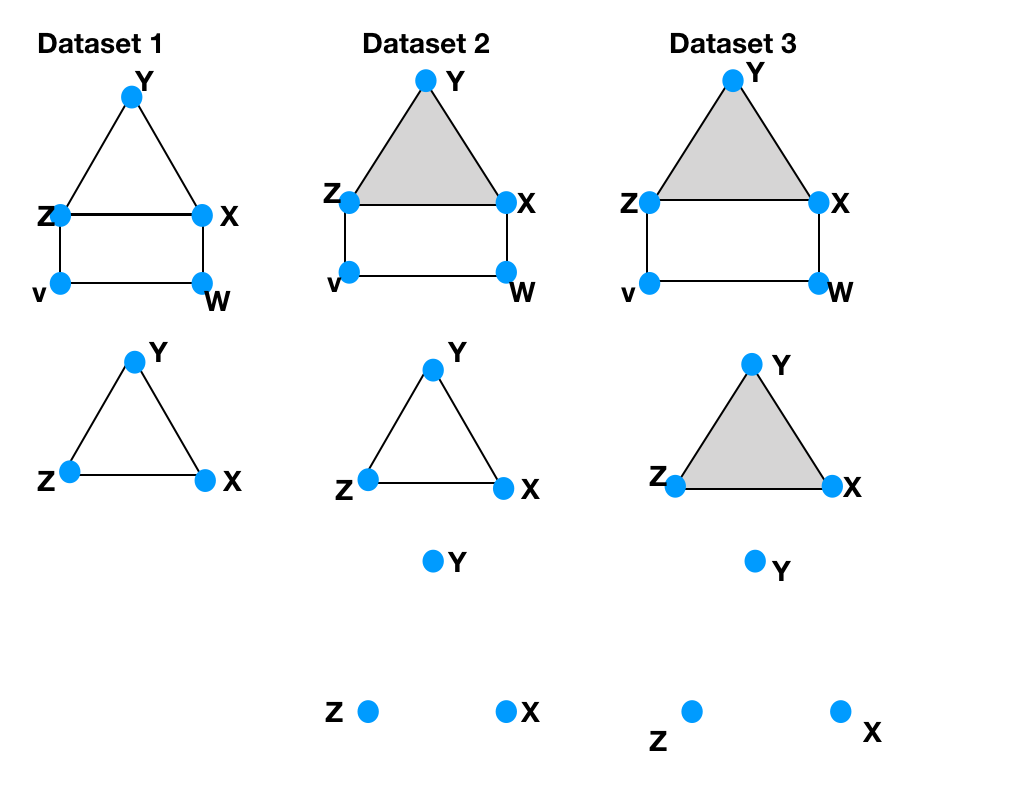

In [5]:
display.display(Image.open('filtration.png'))


#### Remarks
- Conventionally in topology a filtered simplicial complex would be indexed in the opposite order,\
 but in concurrence topology descending filtrations are more natural.
- Here we are using a filtration indexed by integer frequencies, whereas in practice they are indexed by a continuum of frequencies. 



## Topological feature of interest: Holes

In this particular approach holes represent negative or weak association among variables.

### Third-order dependences 
An empty triangle detects a weak or negative $3^d$-order dependence.

 ### Fourth-order dependences
Just as before, an empty rectangle pertains to $4^{th}$-order dependence.

### More variables 

If we consider real imaging data sets it is common for sixty or more variables to be active in a single time for a subject.\
 The latter approach is still applicable and does not face $\textcolor{orange}{\textbf{combinatorial explosion}}.$



 With this approach one can detect a $d$-dimensional hole by looking at $d+2$ variables.
 
 A d-dimensional hole highlights  the ${\textbf{shortage}}$ of active groups of d+2 variables compared to those of d+1.
 


# Hypothesis testing for Topological Data Analysis

As constructing complexes and filtrations over complexes is a random process\
then we can see this randomness in the corresponding collection of diagrams.

${\textbf{How?}}$

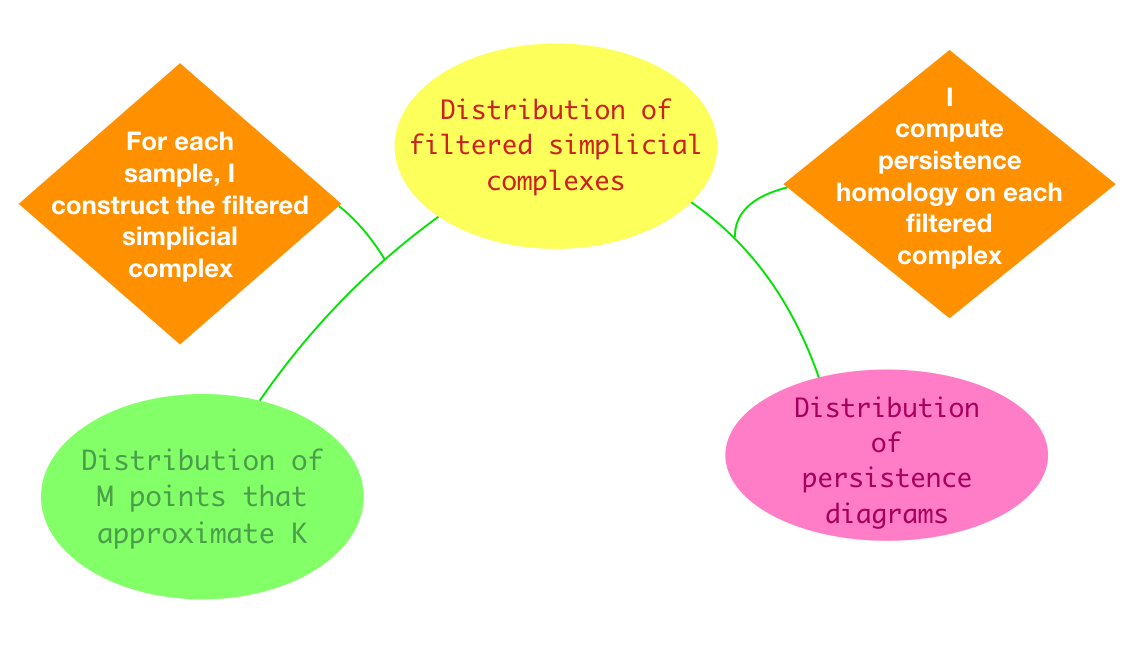

In [3]:
display.display(Image.open('roadmap.png'))


$\textcolor{yellow}{\textbf{Hence, each time we draw m points we are drawing also a persistence diagram}}$.

$\textcolor{yellow}{\textbf{Therefore, we can value persistence diagrams as random elements.}}$

  ### How...
  ...can we learn something on $\mathcal{K} \subset \mathcal{R}^d$ directly by the distribution of persistence diagrams?

  Suppose you also randomly sampled points that approximate $\mathcal{L} \subset \mathcal{R}^d$.

  One thing we would like to know is whether  the two manifolds $\mathcal{K}$ and $\mathcal{L}$ are different.

In the NHST setting we could formulate the following problem:

Given m points that approximate $K$ drawn from a distribution of point clouds $\rho$ and \
m points that approximate  $L$ drawn from a distribution of point clouds $\lambda$:\
$~~~~~~~~~~~~~~~~~$ $\textcolor{pink}{H_0 : \rho=\lambda}$

$~~~~~~~~~~~~~~~~~$ $\textcolor{yellow}{H_1 : \rho \neq \lambda}$

But, since drawing a sample of points corresponds to drawing a persistence diagram from the distribution of persistence diagrams...

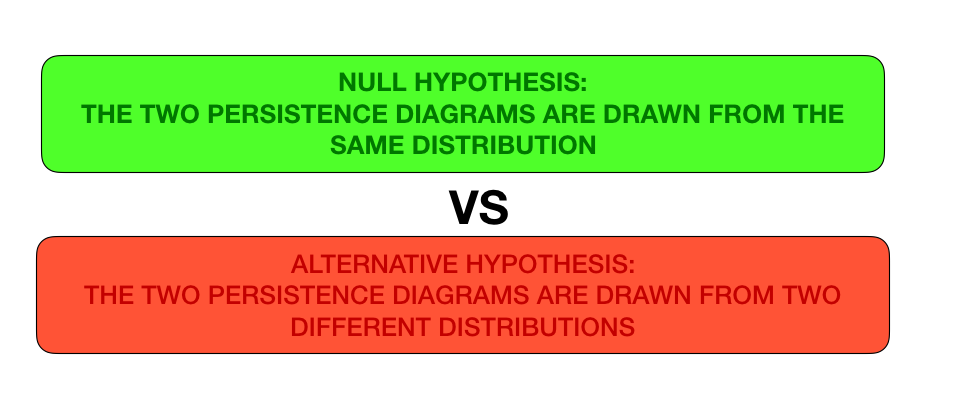

In [3]:
display.display(Image.open('resume1.png'))

# The rationale behind NHST
- choose a parameter that represents a feature for your data 
- form a pertinent hypothesis
- choose a test statistics to estimate the parameter under $H_0$
- compare the observed behaviour with the expected one
- if the observed behaviour is anomalous compared with the expected one under $\textit{H}_0$, then it is considered as an evidence against the acceptance of the null hypothesis.
- the proportion of the set for which the computed test statistics is more extreme than the observed value is called $\textit{p-value}$.


## In our context...

In the space of persistence diagrams, it is not feasible to use any method that requires a parametric model;\
 that is why our process is carried out by a $\textcolor{pink}{\textbf{randomization based test}}$.

Randomization tests are based on the $\textcolor{pink}{\textbf{reiteration}}$ of a process and  ensure a null distribution.

That is why it is more accurate to reformulate the hypothesis as follows:


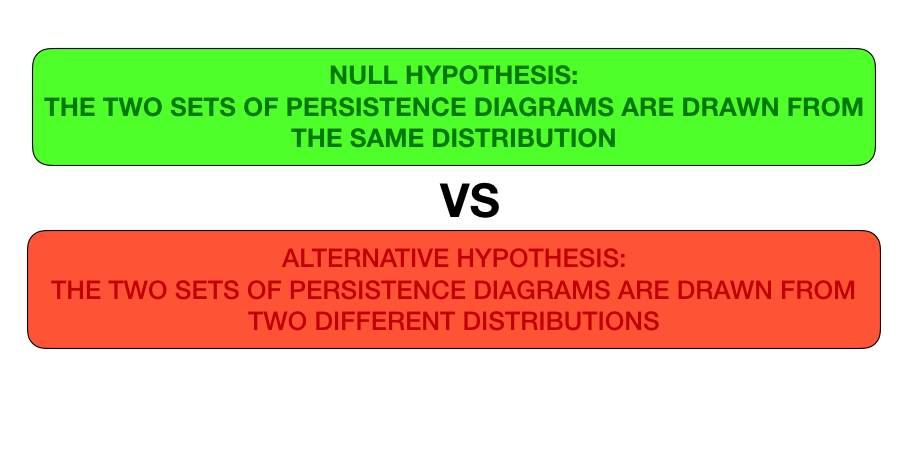

In [4]:
display.display(Image.open('resume2.png'))

$\textcolor{yellow}{\textbf{Sound theory behind it}}$:\
The theory behind a randomization test ensures that when two sets of diagrams are drawn from the same distribution,\
the resulting $\textit{p-value}$ is a random variable uniformly distributed over an evenly spaced subset of [0,1].

$\textcolor{orange}{\textbf{But also issues}}$:
- we do not know of any theory that states that we can safely reject the null hypothesis.
- persistence diagrams are still a summary of our true data


## A t-test for two sets of labels

- $n$ $\textcolor{pink}{\textbf{independent}}$ perstistence diagrams
- $\chi_1$ and $\chi_2$ collections of persistence diagrams, respectively composed of  $n_1$ and $n_2$ diagrams\
 which are the result of a random labelling scheme


$\textcolor{yellow}{\textbf{The pipeline}}$
- construct a coherent set of hypothesis

- choose a joint loss functions such as Wessertein or bottleneck distance

- compute the joint loss function between the two labelling schemes you want to compare. This will give you the observed test statistic.

For persistence diagrams with labelling $L$ into sets $\chi_1$={$X_{1,1},X_{1,2},...,X_{1,n1}$} and $\chi_2$={$X_{2,1},X_{2,2},...,X_{2,n2}$}, we get the following joint loss function:

$~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~$ $\sigma_{\chi_{12}}^2(L)$= $\sum_{m=1}^2 \frac{1}{2n_{m}(n_{m}-1)}\sum_{i=1}^{n_{m}} \sum_{j=1}^{n_{m}} d(X_{m,i},X_{m,j})^2$

which is a function of the within-group pairwise distance.

- generate the null distribution by randomization test, i.e. ramdomly permute points in one or both diagrams\
and recalculate the joint loss function by uniformly sampling on the set of permutations
- compute p-value and compare the observed test statistic to the null distribution obtained from the randomization tests. 


### The algorithm

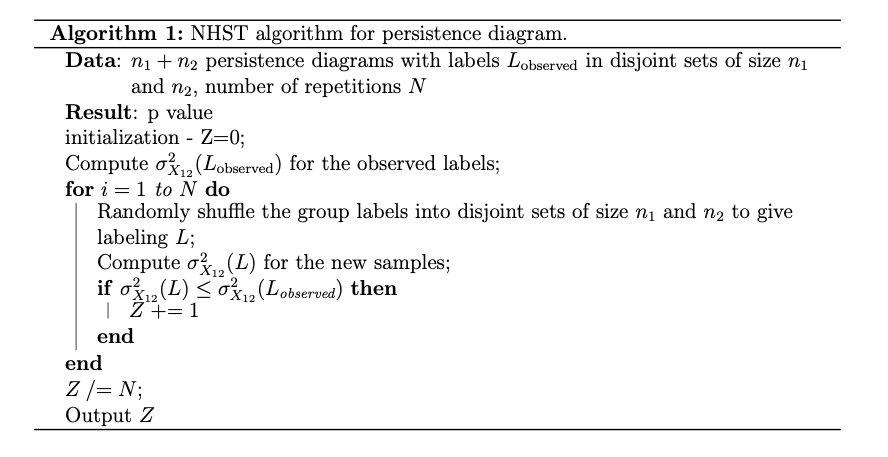

In [11]:
display.display(Image.open('im4.png'))

$\textcolor{yellow}{\textbf{Z is a flag value}}$: every time the  joint loss function is less than the observed one, it gets updated.

## Why can we consider the output as the p-value?
$\textcolor{yellow}{\textbf{Consider this lemma}}$:

Let {$X_{11},X_{12},...,X_{1n_1}$} and { $X_{21},X_{22},...,X_{2n_2}$} be persistence diagrams $i.i.d.$,\
 namely drawn under the null hypothesis and let $\alpha$ be the output of the aforementioned algorithm.\
  Then, for all $p \in [0,1]$ whe have that $\mathcal{P}(\alpha \leq p) \leq p$.





Indeed, within the algorithm we also randomly sample N different sets of labels alongside the oberved ones. 

Let the random variable $W$ be the number of different labels.

The persistence diagrams are drawn iid, 

so there is uniform probability to have the location of the original labelling over all the other rankings.

That is, $W \sim \mathcal{U}(0,N)$.

This implies that $\mathcal{P}(W \leq k) \leq k$ for all $k \in \{0,...,N\}$. 

Furthermore, for $p=\frac{k}{N}$ we get $\mathcal{P}(W/N \leq p) \leq p$ for all $p \in [0,1]$.

By exploiting the coupling $W/N \leq Z$ we get that $\mathcal{P}(Z\leq p) \leq \mathcal{P}(W/N \leq p) \leq p$, which is what we wanted.

## Implementation

In [ ]:
import numpy as np
from sklearn.metrics import pairwise_distances
from sklearn.utils import check_array

def bottleneck_distance(persistence_diagram_1, persistence_diagram_2):
    X = check_array(persistence_diagram_1)
    Y = check_array(persistence_diagram_2)
    
    return np.max(pairwise_distances(X, Y, metric='cityblock'))

def persistence_test(persistence_diagram_1, persistence_diagram_2, num_permutations=1000):
    # Calculate the observed test statistic (Bottleneck distance)
    observed_statistic = bottleneck_distance(persistence_diagram_1, persistence_diagram_2)
    
    # Generate the null distribution
    null_statistics = []
    for _ in range(num_permutations):
        # Randomly permute the points in one or both persistence diagrams
        permuted_diagram_1 = np.random.permutation(persistence_diagram_1)
        permuted_diagram_2 = np.random.permutation(persistence_diagram_2)
        
        # Calculate the joint loss function (Bottleneck distance) for the permuted diagrams
        null_statistic = bottleneck_distance(permuted_diagram_1, permuted_diagram_2)
        null_statistics.append(null_statistic)
    
    # Compute the p-value
    p_value = (np.sum(null_statistics >= observed_statistic) + 1) / (num_permutations + 1)
    
    return observed_statistic, p_value


# Confidence Intervals 

Confidence intervals  for persistence diagrams provide a good and rigorous framework \
for selecting significant topological features in a persistence diagram.

We derive a simple method for $\textcolor{orange}{\textbf{separating topological noise from topological signal}}$. 




### We need some sound theory

$\textcolor{yellow}{\textbf{Bottleneck distance stability theorem }}$

Let $\mathcal{X}$ be finitely triangulable, and let $f,g:\mathcal{X} \rightarrow \mathcal{R}$ be continous.\
 Then the bottleneck distance between the corresponding persistence diagrams in bounded from above by the $L_\infty$ distance between them,\
  i.e.
$ W_\infty(\textit{P}(f),\textit{P}(g)) \leq ||f-g||_\infty $ where $P(f)$ is the overlay of all persistence diagrams for $f$.

#### We can bound from above the bottleneck distance by the Hausdorff Distance

Consider $A$ and $B$, two compact subsets of $\mathcal{R}^d$. \
The $\textcolor{yellow}{\textbf{Hausdorff distance}}$ between these two sets is:

$~~~~~~~~~~~~~~$ $\textbf{H}(A,B)= \max\limits_{x \in A} \bigg\{ \max\limits_{x \in A} \min \limits_{y \in B} ||x-y||,\max\limits_{x \in B} \min \limits_{y \in A} ||x-y|| \bigg\}$ $ = ||f-g||_\infty $ 

### In our setup...
Let us consider $M$ a d-manifold embedded in a compact subset of $X \subset \mathcal{R}^d$ \
with corresponding $P$ persistence diagram and S is any subset of $M$; \
for the stability theorem we have that $ W_\infty (\textit{P}_S,\textit{P}) \leq  \textbf{H}(S,M) $ ,\
where $\textit{P}_S$ is the resulting persistence diagram of S

### The stability theorem's importance is clear:
$\textcolor{yellow}{\textbf{we reduce the problem of inferring persistence homology to the problem of inferring Hausdorff distance.}}$.

#### The definition of confidence set

Let $M\subset R^d$ with $P$ persistence diagram and \
$S_n$={$X_1,...,X_n$} an approximation of $M$ with relative persistence diagram $\hat{P}$.

 Given $\alpha \in (0,1)$, we find  a ${c_n \approx c_n(X_1,...,X_n)}$ such that:

$\lim \limits_{n \rightarrow \infty}sup P(W_\infty(\hat{P},P)> c_n) \leq \alpha$

We then find $C_n=[0,c_n]$, an asymptotic $1-\alpha$ $\textcolor{yellow}{\textbf{confidence set for the bottleneck distance}}$ $W_\infty(P,\hat{P})$, that is:

$\lim \limits_{n \rightarrow \infty}inf P(W_\infty(\hat{P},P) \in C_n) \leq 1-\alpha$

From the stability theorem and the fact that $||d_M-d_{(S_n)}||_\infty$=$\textbf{H}(S_n,M)$ we have that $W_\infty(\hat{P},P) \leq \textbf{H}(S_n,M)$.\
Therefore it is sufficient to find $c_n$ such that 

$\lim \limits_{n \rightarrow \infty}sup P(\textbf{H}(S_n,M)> c_n) \leq \alpha$

The confidence set $C_n$ then is a subset of all persistence diagrams whose distance to $\hat{P}$ is at most $c_n$,

$C_n=\{\hat{P}: W_\infty(\hat{P},P) \leq c_n\}$

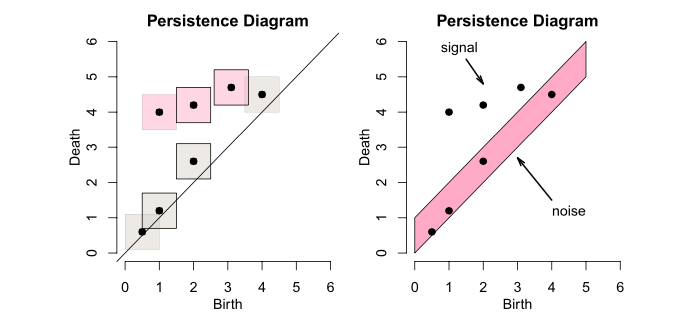

In [12]:
display.display(Image.open('im1.png'))

##### Gentle reminder
This dichotomy between "signal" (significant point) and "noise" is not the only way to estimate the uncertainty in persistence diagrams. 
#### Further developments...

Sometimes points near the diagonal can be significative and one can think of estimating their valuability by creating an adapting method.

## The implementation
The implementation relies on the $\textcolor{yellow}{\textbf{subsampling method}}$. 

Subsampling reduces the size of data by selecting a subset of original data at a time with replacement.

 In structured data as complexes it is simply a uniform selection across the structured i-j-k coordinates.

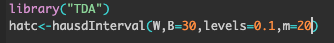

In [18]:
display.display(Image.open('im2.png'))

In [1]:
import pandas as pd
import numpy as np
import pickle as pickle
import gudhi as gd
import seaborn as sbs
from scipy.spatial import distance_matrix
from gudhi import representations
from pylab import *

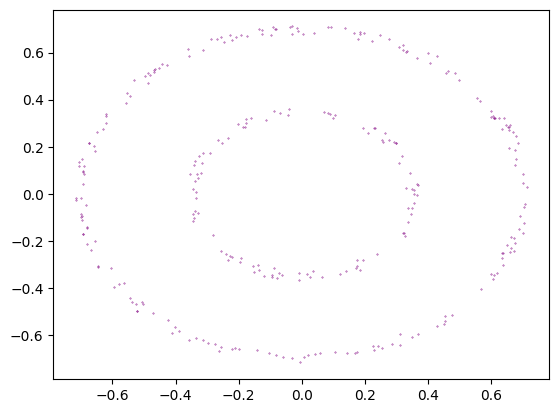

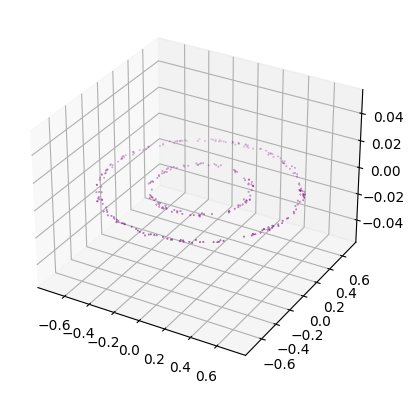

In [2]:
##____________
## Let us give a shape to our point cloud in order to draw some conclusion from it
##____________
U1 = np.random.uniform(0,2 *  pi,size= 100)
V1 = np.array([[0.35 * cos(u) +0.02*np.random.uniform(-1,1) ,
                0.35 *sin(u)+0.02*np.random.uniform(-1,1)] for u in U1])
U2 = np.random.uniform(0,2 *  pi,size= 200)
V2 = np.array([[0.7* cos(u) +0.02*np.random.uniform(-1,1) ,
                0.7*sin(u)+0.02*np.random.uniform(-1,1)] for u in U2])
W = np.concatenate((V1,V2), axis=0)
plt.scatter(W[:,0],W[:,1],s=0.1,c='purple')
fig=plt.figure()
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(W[:,0],W[:,1],s=0.1,c='purple')

In [3]:
##_______
## Vietoris-Rips complex
##_______
skeleton = gd.RipsComplex(points = W, max_edge_length = 0.2)
Rips_simplex_tree_sample = skeleton.create_simplex_tree(max_dimension=3)


<Axes: title={'center': 'Persistence diagram'}, xlabel='Birth', ylabel='Death'>

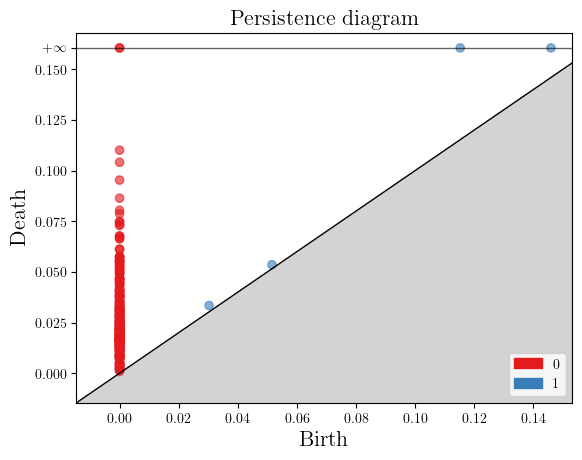

In [4]:
##______
## Computation of the persistence diagram
##______
pers_rips_W= Rips_simplex_tree_sample.persistence()
gd.plot_persistence_diagram(pers_rips_W)

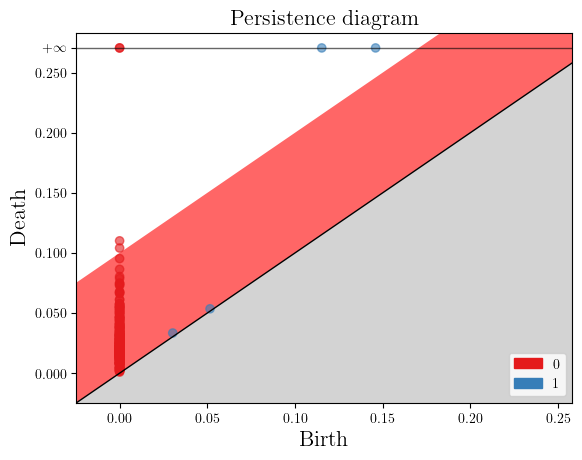

In [5]:
##_____
## Detect the noisy features
##_____
hatc=0.05
gd.plot_persistence_diagram(pers_rips_W, band=2 * hatc);

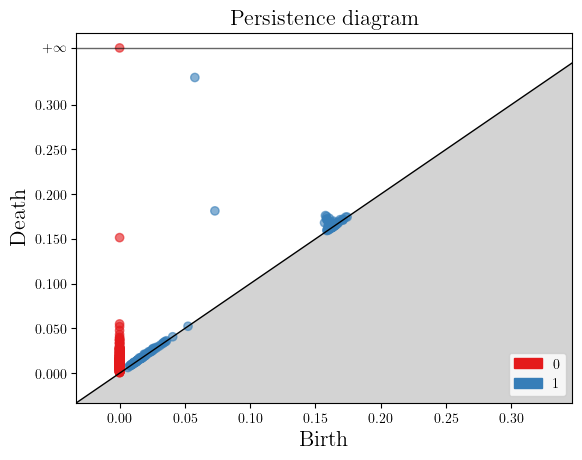

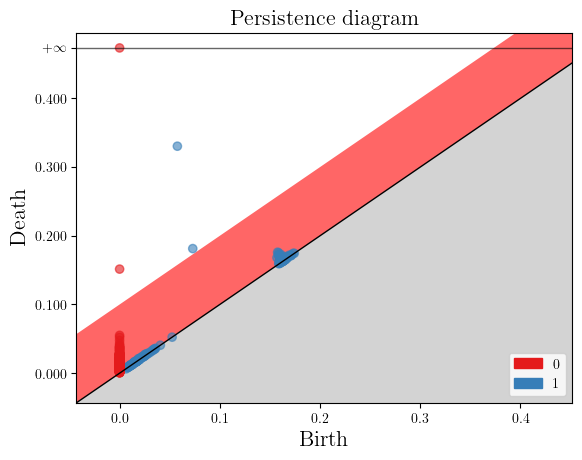

In [6]:
##_______
## Do the same as before for the Alpha complex minding the scaling
##_______
Alpha_complex_W = gd.AlphaComplex(points = W)
Alpha_simplex_tree_W = Alpha_complex_W.create_simplex_tree() 
Alpha_simplex_tree_W_list = Alpha_simplex_tree_W.get_filtration()
for splx in Alpha_simplex_tree_W_list: #check the scale
    Alpha_simplex_tree_W.assign_filtration(splx[0],filtration= np.sqrt(splx[1]))
pers_alpha_W= Alpha_simplex_tree_W.persistence()
gd.plot_persistence_diagram(pers_alpha_W)
hatc=0.05
gd.plot_persistence_diagram(pers_alpha_W, band=2 * hatc);